In [1]:
#本章需导入的模块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm

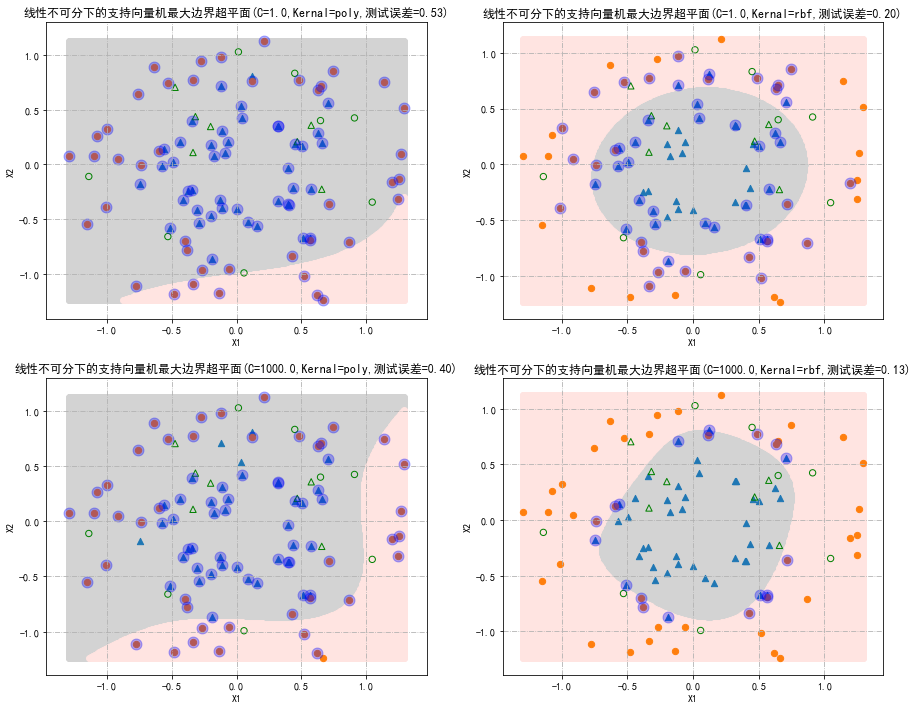

In [2]:
N=100
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=1)
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
for C,ker,H,L in [(1,'poly',0,0),(1,'rbf',0,1),(1000,'poly',1,0),(1000,'rbf',1,1)]:
    modelSVC=svm.SVC(kernel=ker,random_state=123,C=C) 
    modelSVC.fit(X_train,Y_train)
    Y0=modelSVC.predict(X0)
    axes[H,L].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H,L].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    for k,m in [(1,'^'),(0,'o')]:
        axes[H,L].scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
        axes[H,L].scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
        
    axes[H,L].scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
    axes[H,L].set_xlabel("X1")
    axes[H,L].set_ylabel("X2")
    axes[H,L].set_title("线性不可分下的支持向量机最大边界超平面(C=%.1f,Kernal=%s,测试误差=%.2f)"%(C,ker,1-modelSVC.score(X_test,Y_test)))
    axes[H,L].grid(True,linestyle='-.')

代码说明：
（1）第1至3行：生成与8.6.4节相同的模拟数据，包含两个输入变量，为非线性可分样本。利用旁置法将数据集划分为训练集和测试集。
（2）第4，5行：为绘制分类边界准备数据：数据为在输入变量取值范围内的250000个样本观测点。
（3）第7至21行：利用for循环建立多个支持向量分类机。